In [2]:
from disease_model import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# model = DiseaseModel(10)
# for i in range (10):
#     model.step()

# disease_spread = [a.state for a in model.schedule.agents]

# plt.hist(disease_spread)

# disease_total = []
# for j in range(100):
#     model = DiseaseModel(10)
#     for i in range(10):
#         model.step()

#     for agent in model.schedule.agents:
#         disease_total.append(agent.state)

# plt.hist(disease_total, bins=range(max(disease_total)+1))

In [10]:
model = DiseaseModel(200, 50, 50)
for i in range(20):
    model.step()

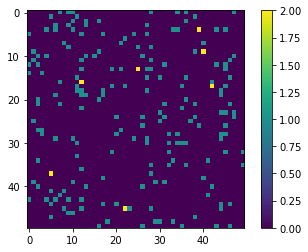

In [11]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()

In [13]:
agent_state = model.datacollector.get_agent_vars_dataframe()
agent_state

State
Step AgentID       
0    0            0
     1            1
     2            0
     3            1
     4            1
...             ...
19   195          0
     196          1
     197          3
     198          3
     199          0

[4000 rows x 1 columns]